In [55]:
import os

'''
expected_filenames = ["results" + str((i+1)*10) + ".txt" for i in range(157)]
expected_filenames.append("results1576.txt")
#print(sorted(expected_filenames))

data_dir = "../data/" + res_dir + "/raw/"
filenames = os.listdir(data_dir)
#sorted(filenames)
sorted(filenames) == sorted(expected_filenames)
'''

os.getcwd()
res_dir = "gpt-3-5-prompt3-sci"

In [56]:
filenames = ["../data/" + res_dir + "/raw/results" + str((i+1)*10) + ".txt" for i in range(157)]
filenames.append("../data/" + res_dir + "/raw/results1576.txt")

In [79]:
with open("../data/" + res_dir + "/results_raw.txt", 'w') as output:
    for file_name in filenames:
        with open(file_name, 'r') as file:
            output.write(file.read())
            output.write("\n-----\n")

Taking a look at `raw_results.txt`
- Remove all "*"
- Remove all lines that start with '(")' or dont start with '('
This way we get only the part of the answers we want

In [80]:
with open("../data/" + res_dir + "/results_raw.txt", 'r') as infile, open("../data/" + res_dir + "/results_processed.txt", 'w') as outfile:
    for line in infile:
        # Remove all "*"
        line = line.replace('*', '')

        # find broken files
        line = line.replace("-----", "(-----)")

        # Remove lines that don't start with '(' or start with '("'
        if line.startswith('(') and not line.startswith('("'):
            outfile.write(line)

In [81]:
# find broken blocks:

with open("../data/" + res_dir + "/results_processed.txt", 'r') as file:
    content = file.read()

# Split the content into blocks using "(-----)" as the separator
blocks = content.split("(-----)")
blocks = blocks[:len(blocks)-1]

# Count the number of blocks
print(len(blocks)) # correct = 158
print(blocks[-1]) # last block has length of 6

# Check if each block has exactly 10 lines
for i, block in enumerate(blocks):
    if len(block.strip().split('\n')) != 10:
        print(f"block broken: {i+1} (results{(i+1) * 10}.txt) - this are questions {(i)*10+1} - {(i+1)*10}")
#all_blocks_have_10_lines = all(len(block.strip().split('\n')) == 10 for block in blocks)

158

(thought, society)
(action, society)
(action, personal)
(society, personal, interpersonal, dependability)
(society, rules)
(society, caring)

block broken: 158 (results1580.txt) - this are questions 1571 - 1580


In [82]:
with open("../data/" + res_dir + "/results_processed.txt", 'r') as infile, open("../data/" + res_dir + "/results_final.txt", 'w') as outfile:
    for line in infile:
        if not line.startswith('(-'):
            outfile.write(line)

In [83]:
values = [
    "thought",
    "action",
    "stimulation",
    "hedonism",
    "achievement",
    "dominance",
    "resources",
    "face",
    "personal",
    "society",
    "tradition",
    "rules",
    "interpersonal",
    "humility",
    "caring",
    "dependability",
    "concern",
    "nature",
    "tolerance",
    "objectivity"
]

def decode(answer):
    labels = [0 for i in range(20)]
    for a in answer:
        print(a)
        labels[values.index(a)] = 1
    return labels

def transform_string(s):
    # Remove parentheses and split by commas
    val = s.strip('()').split(',')
    # Strip any leading or trailing whitespace from each value
    val = [val.strip() for val in val]
    return val

answers_raw = []
with open("../data/" + res_dir + "/results_final.txt", 'r') as file:
    for line in file:
        answer = line.replace("\n", "").lower()

        answer = answer.replace("societal", "society")
        answer = answer.replace("social", "society")
        answer = answer.replace("environmental", "nature")
        answer = answer.replace("environment", "nature")
        answer = answer.replace("egalitarian", "X")
        answer = answer.replace("scientific", "X")
        answer = answer.replace("rule,", "rules,")
        answer = answer.replace("rule)", "rules)")

        answers_raw.append(answer)


hist_answers = []
for answer in answers_raw:
    for a in transform_string(answer):
        hist_answers.append(a)


key made up by chatGPT: freedom
key made up by chatGPT: fairness
key made up by chatGPT: equality
key made up by chatGPT: freedom of speech
key made up by chatGPT: law
key made up by chatGPT: constitutional right
key made up by chatGPT: gender equality
key made up by chatGPT: family
key made up by chatGPT: justice
key made up by chatGPT: health
key made up by chatGPT: security
key made up by chatGPT: patriotism
key made up by chatGPT: human rights
key made up by chatGPT: free expression
key made up by chatGPT: privacy
key made up by chatGPT: humanity


Counter({'society': 606,
         'personal': 451,
         'resources': 310,
         'rules': 307,
         'thought': 294,
         'concern': 272,
         'action': 152,
         'interpersonal': 117,
         'caring': 113,
         'achievement': 103,
         'tradition': 91,
         'nature': 68,
         'dominance': 61,
         'dependability': 37,
         'objectivity': 31,
         'humility': 29,
         'face': 25,
         'stimulation': 24,
         'tolerance': 21,
         'hedonism': 16,
         'equality': 7,
         'freedom': 4,
         'fairness': 3,
         'gender equality': 3,
         'freedom of speech': 2,
         'justice': 2,
         'health': 2,
         'law': 1,
         'constitutional right': 1,
         'family': 1,
         'security': 1,
         'patriotism': 1,
         'human rights': 1,
         'free expression': 1,
         'privacy': 1,
         'humanity': 1})

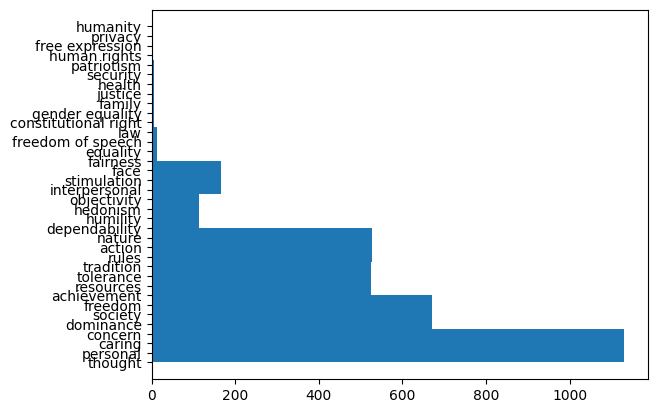

In [84]:
import matplotlib.pyplot as plt
from collections import Counter

plt.hist(hist_answers, orientation='horizontal')
for key in (Counter(hist_answers).keys()):
    if key not in values:
        print(f"key made up by chatGPT: {key}")

Counter(hist_answers)